# <center> Machine Learning for Stock Prediction and Trading</center>
<center>June, 2017</center>

## <center> Introduction </center>

The objective of this effort is to demonstrate how to apply machine learning predictive analytics algorithms in a stock trading strategy. There are many publicly available examples of how to train a stock price prediction model including illustrating accuracy of the model, but there seem to be few publicly available examples showing how to apply the model to generate positive trading results. This article demonstrates a strategy for how to train an adaptive model to predict up or down price movement and apply the model in order to achieve improved trading results. Additionally, the Python software used in the examples is contributed as open source software (GPL v3).

We demonstrate how to load stock data into a Panda's DataFrame, how to construct a feature set for machine learning, generate truth data for supervised learning, how to train a model using Python's sciit-learn (Python's machine learning toolkit), apply the model in a trading strategy, and backtest. Several Python support functions are contributed in order to simplify the process. These are available in Github (). We keep the **discussion at the conceptual level** and leave detailed study of the software as an exercise to the interested reader. The author is happy to converse offline (email) for the sake of answering questions, clarifications and constructive suggestions.

### Trading Strategy

Trading Strategy

We look at two stocks MMM and AAPL ... we find ... 

![Rendering preferences pane](./TradeStrategy.png)

### Disclaimer
This article and the corresponding software are meant for example purposes. Any financial gain or loss resulting from the software or examples in this article are at your own risk and liability.


# <center> Jupyter Notebook Setup </center>

This is a Jupyter notebook ... Python ... ... The first step in the overall process is to import packages, set a fiew notebook environment variables and load the stock data. Each of these steps are shown in the code block below.

### Imports
 In summary, the following libraries are imported. The Pandas library adds support for DataFreames. Numpy adds support for multi-dimensional arrays and matrices. Datetime adds the capability for handling dates and corresponding manipulations. Matplotlib adds support for plotting. The  **algosciquant** softare is code developed especially for this use case and is available from the Github repo (** **). It contains several convenience functions for importing stock data, extracting machine learning features, generating truth variables for supervised learning, training a predictive model and running stock prediction.

### Stock Data
A detailed description of how to download or acquire the stock data will be discussed in a separate article. Here we will briefly describe the data and sources. We obtain stock data from three different data sources, save to a CSV file corresponding to the specific stock. This article starts with loading CSV file, as shown in the code block. The S&P 500 data was downloaded from Yahoo Finance and includes Open Price, Close Price, High Price, Low Price, and Volume. One benefit of obtaining the S&P data from Yahoo is that historical data is available going back to January of 1950. Data for specific securities is acquired from one of two different sources Intrionio (**Intrinio com**) or Google Finance. Intrinio provides a rich set of data. In addition to the standard set of price variables (Adjusted Close, Open, Close, High, Low) and Volume, it also provides fundamentals such as Price to Earnings, EBITDA, Earnings Yield, Quick Ratio, etc. available through their API. Initial free service for developers ... Data going back 10 years (~ 2007). For historical data going back greater than 10 years stock data is acquired from Google finance. Though Google offers a greater historical time it does not contain fundamentals and is restricted to the standard set of price variables (Adjusted Close, Open, Close, High, Low) and Volume. However, in many situations this is enough and the extended historical time-frame is quite valuable. 

### Stock Data Plots
Finally, in order to get a visual sense of the stock, we plot the the _adjcloseprice_ and some additional variables. In this case we've chosen the 3M stock "MMM." We note a couple of trends that will be important later. The stock has a general upward trend with some short term negative troughs. In particular, mid year 2012, mid 2015 and early 2016 are negative periods, each followed by a return to the general upward trend. We will learn that stocks with this type of behavior (genral upward with some short periods of negativity) seem to do well for our strategy. Additionally, we observe some interesting behavior with the stocks fundamental variables. We visually observe some correlation between the _pricetoearnings_ variable and the stock price. The _ebitdagrowth_ and _quickratio_ show some strong movement and may be helpful as feature variables. These variables are available once per quarter and are filled forward, which explains the step function movement. However, in contrast we do not see very much movement for the _earningsyield_.   

filename = ./stock_data/stock_MMM.csv
MMM
start date = 2011-01-01 00:00:00
end date = 2017-04-28 00:00:00


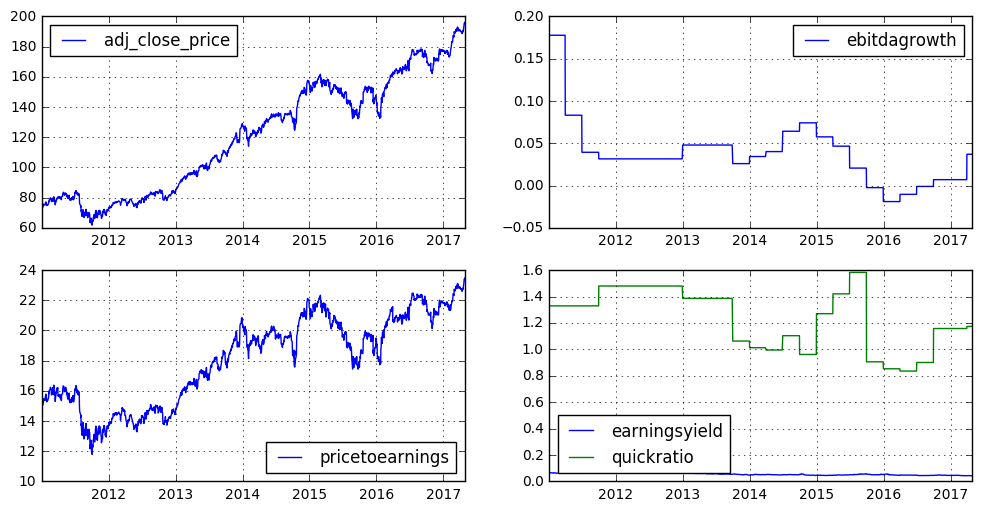

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from matplotlib import rcParams
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
%matplotlib inline
%run algosciquant.py

# Paramters
ticker = "MMM"  # 
dataStartDate=dt.datetime(2007,1,1)                     
train_st = dataStartDate
test_st = dt.datetime(2011,1,1)
test_et = dt.datetime(2017,4,28)

# Load Data
   # S&P 500
dfsp = pd.read_csv('./stock_data/sp500.csv',index_col=0,parse_dates=True)
dfsp = dfsp.loc[dataStartDate:]

   # Stocks
filename='./stock_data/stock_'+ticker+'.csv' # stock data downloaded from Intrinio (w/fundamentals)
g=0 # if g==1 then use data downloaded from google finance (w/o fundamentals)
if g==1: filename='./stock_data/stock_'+ticker+'_g.csv'
print('filename =',filename)
dfs = pd.read_csv(filename,index_col=0,parse_dates=True)
dfs = dfs.loc[dataStartDate:]

# Plot 
print(ticker)
print('start date =',test_st)
print('end date =',test_et)

rcParams['figure.figsize'] = 12, 6
plt.subplot(221)
plt.plot(dfs.loc[test_st:test_et,['adj_close_price']],label='adj_close_price'); plt.grid(True) ; plt.legend(loc='upper left')

if g!=1:
    plt.subplot(223)
    plt.plot(dfs.loc[test_st:test_et,['pricetoearnings']],label='pricetoearnings')
    plt.grid(True) ; plt.legend(loc='lower right')

    plt.subplot(222)
    plt.plot(dfs.loc[test_st:test_et,['ebitdagrowth']], label='ebitdagrowth')
    plt.grid(True); plt.legend(loc='upper right')

    plt.subplot(224)
    plt.plot(dfs.loc[test_st:test_et,['earningsyield']],label='earningsyield')
    plt.plot(dfs.loc[test_st:test_et,['quickratio']],label='quickratio')
    plt.grid(True); plt.legend(loc='lower left')
      

## <center> ML Features </center>

sdafsdlkfj

a;ldfjsdajf 

MMM
nday = 40
start date = 2011-01-01 00:00:00
end date = 2017-04-28 00:00:00
sp = 1 ma =  1 ,h =  1 ,v =  1 ,f =  1
ML features
Index(['adj_close_price', 'volume', 'adj_close_pricer', 'sp_close_price',
       'sp_close_pricer', 'ebitdagrowth', 'pricetoearnings', 'quickratio',
       'adj_close_price_h1', 'adj_close_price_h2', 'ma60', 'ma120', 'pma60',
       'pma120', 'vol_y_10', 'vol_y_50', 'vol_y_120'],
      dtype='object')


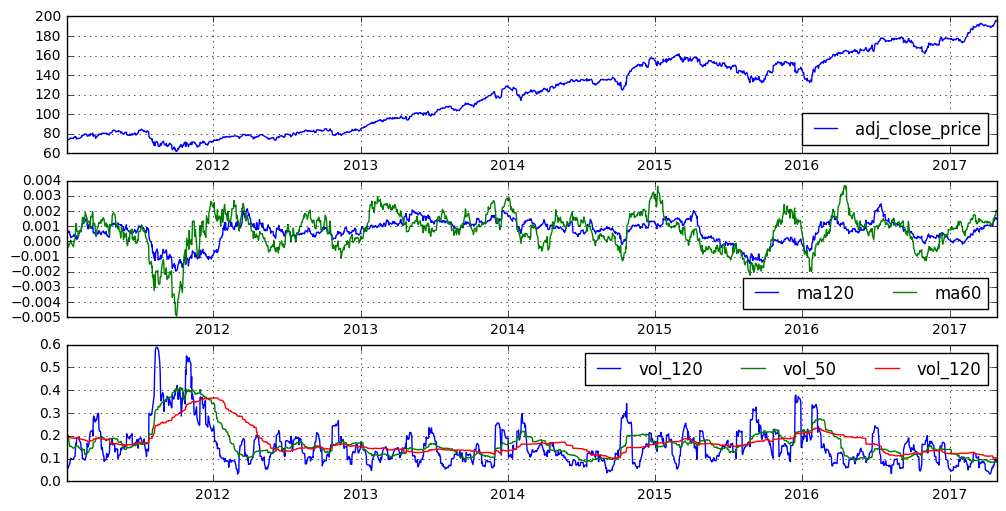

In [2]:
# ML Features and Truth
%run algosciquant 

# Truth
nday=40
dfT= ndayTruth(dfs.loc[dataStartDate:test_et, ['adj_close_price']], nday)

# ML Features
f=1
if g==1:f=0
sp=1;ma=1;h=1;v=1
dfML = mlStockFeatures(dfs,dfsp,dataStartDate,test_et,f,h,ma,v)
#dfML = mlStockFeatures(dfs,dfsp,dataStartDate,test_et)
print(ticker)
print("nday =",nday)
print('start date =',test_st)
print('end date =',test_et)
print('sp =',sp  ,'ma = ',ma,',h = ',h,',v = ',v,',f = ',f)
print("ML features")
print(dfML.columns)

#Save dfML File
dfML.to_csv("dfML.csv")

# Plot
plt.subplot(311)
plt.plot(dfML.loc[test_st:test_et,['adj_close_price']],label='adj_close_price')
plt.grid(True); plt.legend(loc = 'lower right')
if ma==1:
    plt.subplot(312);  
    plt.plot(dfML.loc[test_st:test_et,['ma120']],label='ma120')
    plt.plot(dfML.loc[test_st:test_et,['ma60']],label='ma60')
    plt.grid(True); plt.legend(loc = 'lower right', ncol= 2)
if v==1:
    plt.subplot(313)
    plt.plot(dfML.loc[test_st:test_et,['vol_y_10']],label='vol_120')
    plt.plot(dfML.loc[test_st:test_et,['vol_y_50']],label='vol_50')
    plt.plot(dfML.loc[test_st:test_et,['vol_y_120']],label='vol_120')
    plt.grid(True)
    plt.legend(loc = 'upper right',ncol=3)


In [3]:
# Training and Prediction
#   for each test date a classifier will be trained until test date - 1

%run algosciquant 

model='DT' 
print('ticker =',ticker)
print('model =',model)
print('nday =',nday)
print('start date =',test_st)
print('end date =',test_et)
print('sp =',sp,'ma =',ma,'h = ',h,',v = ',v,',f = ',f,)
print("")

# Create training data frames ... separate into X and Y
X = dfML.loc[train_st:test_et,dfML.columns]
Y = dfT.loc[train_st:test_et]

##### Train and Predict
vrb = 1 # verbosity level, 0, 1, 2
dfTR,clf = mClfTrainTest(X,Y,nday,train_st,test_st,test_et,model,v=vrb)

##### Save
str_test_et=str(test_et.year)+str(test_et.month)+str(test_et.day)
str_test_styr=str(test_st.year)
save_dtr_filename='dfclfm_'+ticker+'_nd'+str(nday)+'f'+str(f)+'h'+str(h)+'v'+str(v)+'ma'+str(ma)+'_'+str_test_styr+'_'+str_test_et+'_'+model+'.csv'
print('filename =',save_dtr_filename)
dfTR.to_csv(save_dtr_filename)
print(dfTR[['adj_close_price','t' ,'p','p_1']].tail(5))

#dfclfm_MMM_nd43f1h1v1ma1_2011_2017428_RF.csv
#dfclfm_AAPL_nd43f1h1v1ma1_2011_2017428_RF.csv
# Confustion Matrix

(samplesize, errors, correct, er, fn, fp, tp, tn, fnr, fpr, tpr, tnr, dfCMdef, dfCMA, dfCMR)=clfMktConfusionMatrix(dfTR,"t",'p')

# Volatility

vol='120'; maw='120'
if ticker== 'APPL': vol='10' ; maw='60'
if ticker== 'MMM': vol='10' ; maw='120'

if v==1 and ma==1:
    dfTR=volatilityPrice(dfTR,vol,maw)

# Print Results
print("\nerror rate =",er)
dfCMR[['Totals','Predicted MktDown','Predicted MktUp']]

ticker = MMM
model = DT
nday = 40
start date = 2011-01-01 00:00:00
end date = 2017-04-28 00:00:00
sp = 1 ma = 1 h =  1 ,v =  1 ,f =  1

2011-01-03
2012-01-03
2013-01-02
2014-01-02
2015-01-02
2016-01-04
2017-01-03

filename = dfclfm_MMM_nd40f1h1v1ma1_2011_2017428_DT.csv
            adj_close_price    t    p  p_1
date                                      
2017-04-24           194.23  1.0 -1.0 -1.0
2017-04-25           195.13  1.0 -1.0 -1.0
2017-04-26           195.00  1.0 -1.0 -1.0
2017-04-27           196.11  1.0 -1.0 -1.0
2017-04-28           195.83  1.0 -1.0 -1.0

error rate = 0.19296040226272784


,Totals,Predicted MktDown,Predicted MktUp
actual MktDown,455,0.782418,0.217582
actual MktUp,1096,0.152372,0.846715


In [24]:
vol='10' # AAPL vol = 50, MMM vol = 120
maw='120' # AAPL maw = 120, MMM maw = 120

#if v==1 and ma==1:
#    dfTR=volatilityPrice(dfTR,vol,maw)

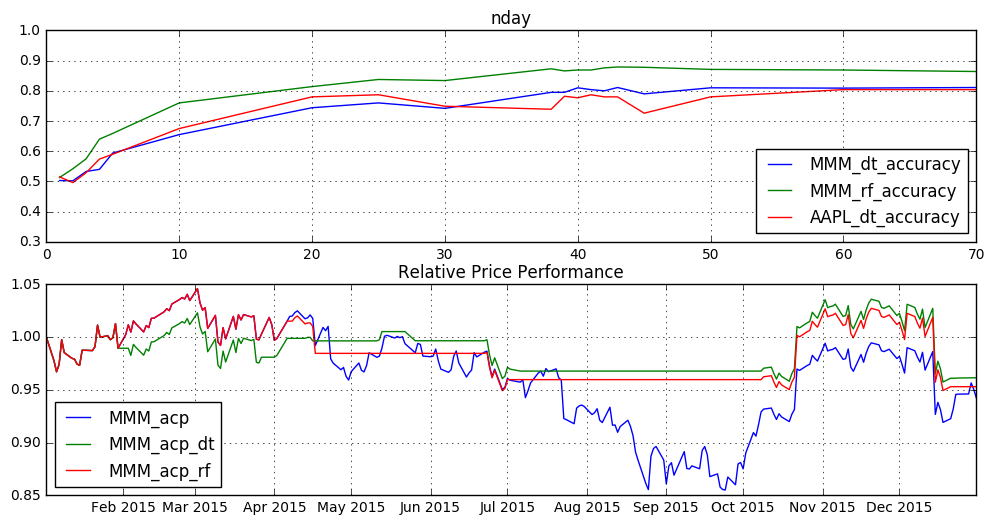

In [4]:
# Training Summary
# MMM, Date 2014-01-01  to 2017-04-28, adj_end_close_price = $195.83
%run algosciquant 

dftsresults = pd.read_csv('./data_jupyter_notebook/dftsresults.csv',index_col=0,parse_dates=True)

fig = plt.figure()
f1 = fig.add_subplot(211)
f1.plot(dftsresults[['MMM_dt_accuracy']],label='MMM_dt_accuracy')
f1.plot(dftsresults[['MMM_rf_accuracy']],label='MMM_rf_accuracy')
f1.plot(dftsresults[['AAPL_dt_accuracy']],label='AAPL_dt_accuracy')
f1.set_xlim(0,70)
f1.set_ylim(0.3,1)
f1.grid(True)
f1.legend(loc='lower right')
f1.set_title('nday')

# MMM Trade Performance

price_variable='adj_close_price'
sdate=dt.datetime(2015,1,1)
edate=dt.datetime(2015,12,31)

files=['./data_jupyter_notebook/dft_MMM_nd40_p_2009_2017428_DT.csv', 
       './data_jupyter_notebook/dft_MMM_nd40_p_2009_2017428_DT.csv',
       './data_jupyter_notebook/dft_MMM_nd40_p_2011_2017428_RF.csv']
lnames=['MMM_acp','MMM_acp_dt','MMM_acp_rf']
dftn,plist=dftn_from_files(sdate,edate,files,price_variable,lnames)

monthFmt = DateFormatter('%m')
f2 = fig.add_subplot(212)
f2.plot(dftn[lnames[0]],label='MMM_acp')
f2.plot(dftn[lnames[1]],label='MMM_acp_dt')
f2.plot(dftn[lnames[2]],label='MMM_acp_rf')
#f2.xaxis.set_major_formatter(monthFmt)
f2.grid(True)
f2.legend(loc='lower left')  
f2.set_title('Relative Price Performance')


In [5]:
# BackTest
%run algosciquant

# Strategy Trade
pvariable='pv' # p, pv
price_variable='adj_close_price'
dft=tradeReturns(dfTR,price_variable)
dft=strategyTrade(dft,price_variable,price_variable+'_R',pvariable)
(dftsummary,dfreturns)=backTestSummary(dft,price_variable,test_st,test_et)

# Save File
str_test_styr=str(test_st.year)
str_test_et=str(test_et.year)+str(test_et.month)+str(test_et.day)
save_dft_filename='dft_'+ticker+'_nd'+str(nday)+'_'+str(pvariable)+'_'+str_test_styr+'_'+str_test_et+'_'+model+'.csv'
dft.to_csv(save_dft_filename)


# Print Results
print("")
print(ticker)
print('strategy trade variable =',pvariable)
print('model =',model)
print('nday =',nday)
print('ma =',maw,'vol =',vol)
print('start date',test_st)
print('end date',test_et)
print('dft filename =',save_dft_filename)

(dftsummary,dfreturns)=backTestSummary(dft,price_variable,test_st,test_et)

print("\nAnnulized Returns:")
print(dfreturns[[ 'nyear',  'Rc' ,  'Rc_strat','Ra','Ra_strat']])
print("\nBacktest Summary:")
dftsummary[['end_adj_close_price','end_adj_close_price_SP','return','return_SP']]


MMM
strategy trade variable = pv
model = DT
nday = 40
ma = 120 vol = 10
start date 2011-01-01 00:00:00
end date 2017-04-28 00:00:00
dft filename = dft_MMM_nd40_pv_2011_2017428_DT.csv

Annulized Returns:
               nyear        Rc  Rc_strat        Ra  Ra_strat
2017-04-28  6.326027  1.640831  2.037562  0.165917     0.192

Backtest Summary:


,end_adj_close_price,end_adj_close_price_SP,return,return_SP
2011,73.184260,82.640672,-0.013086,0.114436
2012,83.582765,94.382807,0.142087,0.142087
2013,129.106143,145.788431,0.513197,0.544650
2014,154.915785,170.833438,0.218326,0.171790
2015,145.762112,161.860123,-0.057597,-0.052527
2016,176.906001,203.482500,0.245240,0.257150
2017,195.830000,225.249441,0.106972,0.106972


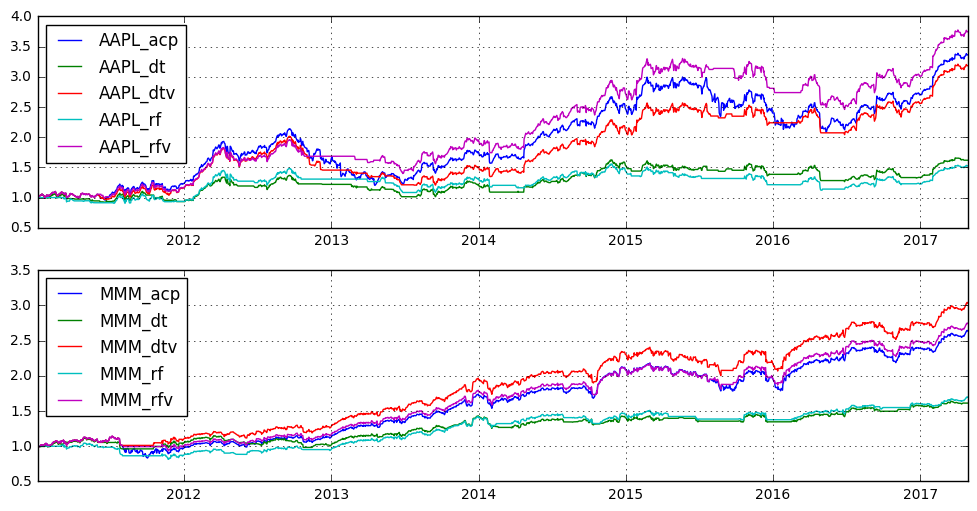

In [6]:
# Graph results ...  normalized trade data frame with start and end times

%run algosciquant
# plot

sdate=pd.datetime(2011,1,1)
edate=pd.datetime(2017,4,28)
price_variable='adj_close_price'

# AAPL
files=['./data_jupyter_notebook/dft_AAPL_nd43_p_2009_2017428_DT.csv','./data_jupyter_notebook/dft_AAPL_nd43_p_2009_2017428_DT.csv',
       './data_jupyter_notebook/dft_AAPL_nd43_pv_2009_2017428_DT.csv','./data_jupyter_notebook/dft_AAPL_nd43_p_2011_2017428_RF.csv',
       './data_jupyter_notebook/dft_AAPL_nd43_pv_2011_2017428_RF.csv']
lnames=['AAPL_acp','AAPL_dt','AAPL_dtv','AAPL_rf','AAPL_rfv']

dftn,lnames=dftn_from_files(sdate,edate,files,price_variable,lnames) 

fig = plt.figure()
f1 = fig.add_subplot(211)
f1.plot(dftn[lnames[0]],label=lnames[0])
f1.plot(dftn[lnames[1]],label=lnames[1])
f1.plot(dftn[lnames[2]],label=lnames[2])
f1.plot(dftn[lnames[3]],label=lnames[3])
f1.plot(dftn[lnames[4]],label=lnames[4])
f1.grid(True)
f1.legend(loc='upper left')


#MMM
files=['./data_jupyter_notebook/dft_MMM_nd40_p_2009_2017428_DT.csv','./data_jupyter_notebook/dft_MMM_nd40_p_2009_2017428_DT.csv',
       './data_jupyter_notebook/dft_MMM_nd40_pv_2009_2017428_DT.csv','./data_jupyter_notebook/dft_MMM_nd40_p_2011_2017428_RF.csv',
       './data_jupyter_notebook/dft_MMM_nd40_pv_2011_2017428_RF.csv']
lnames=['MMM_acp','MMM_dt','MMM_dtv','MMM_rf','MMM_rfv']

dftn,lnames=dftn_from_files(sdate,edate,files,price_variable,lnames) 


f2 = fig.add_subplot(212)
f2.plot(dftn[lnames[0]],label=lnames[0])
f2.plot(dftn[lnames[1]],label=lnames[1])
f2.plot(dftn[lnames[2]],label=lnames[2])
f2.plot(dftn[lnames[3]],label=lnames[3])
f2.plot(dftn[lnames[4]],label=lnames[4])
f2.grid(True)
f2.legend(loc='upper left')



## References

- Find stocks, [Kiplinger 8 Stocks](http://www.kiplinger.com/slideshow/investing/T052-S003-8-stocks-to-buy-now-for-2017/index.html)

- Kiplingers, "10 Great Stocks for the Next 10 Years", December 2016,   PNRA, ADBE, DHR, FBHS, IDXX, LGF

- Kiplingers, "8 Stocks to buy for now", Jan 2017, GOOG, CMD, AAPL, MEDP

- Kiplingers, "My Top Stock Picks for 2017," Jan 2017, AMZN, CVU, SBUX, CRM

- Other stocks, BRK.B, ^GSPC, KO

- Stanford ML CS229 Trend Stock Prediction,  [Stanford CS229 ML Stock Prediction](http://cs229.stanford.edu/proj2013/DaiZhang-MachineLearningInStockPriceTrendForecsting.pdf) ... **ML Features** PE ratio, PX volume, PX ebitda, current enterprise value, 2-day net price change, 10-day volatility, 50-day moving average, 10-day moving average, quick ratio, alpha overridable, alpha for beta pm, beta raw overridable, risk premium, IS EPS, and corresponding S&P 500 index
- CS229 Stock Prediction Feature Selection, ...  http://cs229.stanford.edu/proj2014/Xinjie%20Di,%20Stock%20Trend%20Prediction%20with%20Technical%20Indicators%20using%20SVM.pdf  ... 

- Stanford ML CS229 Text/Article Stock Prediction, [CS229 Bryce Taylor](http://cs229.stanford.edu/proj2013/Taylor-Applying%20Machine%20Learning%20to%20Stock%20Market%20Trading.pdf)
    
- Stock correlations, [Asset Correlations](https://www.portfoliovisualizer.com/asset-correlations)
    
- Example noteboek, [Python Clustering](http://brandonrose.org/clustering)

- Where to get financial data, Quroa - Intrinio, <https://www.quora.com/What-are-some-cheaper-alternatives-to-Bloomberg-data-terminal>

- Intrino, <https://intrinio.com> ... <http://blog.intrinio.com/intrinio-financial-data-in-r-and-rstudio/>  ... API  <http://blog.intrinio.com/stock-api-developers/> ...  <http://docs.intrinio.com>  ... Python Github https://github.com/nhedlund/intrinio .... http://docs.intrinio.com/tags/intrinio-public#data-point .... Converasation with Andrew Carpenter, Intrinio.com ... What I used R for, which I bet you can do better in Python, is to pull in historical prices and then a vector of historical explainatory variables on the same time period. I automated it, and filled forward the quarterly data to match the daily data. Which is the standard in the industry, I learn from my professors. So that gives you a nice clean data frame with as many explainatory variables as you want- valuation metrics, earnings, economic indicators like SPY and VIX. acarpenter@intrinio.com 727-331-3416. ... from the API page  <http://blog.intrinio.com/stock-api-developers/>  good info plus make sure to watch the video. Entire price history using "price" endpoint "https://inntrinio.com/prices?ticker=AAPL" includes 13 data points open, close, adj_high, ... volume  ... use datapoint function to pull in specific data points "https://inntrinio.com/datapoint?ticker=AAPL&item=close_price" ... use the "historical_data" endpoint to pull in time-series "https://inntrinio.com/historical_data?ticker=AAPL&item=pricetoearnings&start_date=2014-01-01&end_date_2015-01-01" ... you can also add in a frequency as "&frequency=yearly"   (yearly, quarterly, monthly, weekly, daily) ... or just the start_date ... **Historical Data Features**  <http://docs.intrinio.com/tags/intrinio-public#historical-data> ... **Modeling financial data in R** ... http://blog.intrinio.com/modeling-financial-data-in-r-with-intrinio/